<h1
    style='text-align:center;font-weight: bolder;'
    >
    Econometría.
</h1>
<p
   style='text-align:center;margin-top:-20px;margin-left:-35px;font-weight: bolder'
   > Gujarati - Porter
</p>

**Econometría** : Medición económica.

<i style='text-align:justify;'>
"La econometría puede definirse como el análisis cuantitativo de fenómenos económicos reales,
basados en el desarrollo simultáneo de la teoría y la observación, relacionados mediante métodos
apropiados de inferencia."
</i>
<br/><br/>
<i style='text-align: justify;'>
"La econometría se defi ne como la ciencia social en la cual las herramientas de la teoría económica,
las matemáticas y la inferencia estadística se aplican al análisis de los fenómenos económicos."
</i>

**Econometría** = Teoría económica **+** Economía matemática **+** Estadística económica y matemática

## Metodología clásica.

<ol>
    <li>Planteamiento de la teoría o hipótesis.</li>
    <li>Especificación del modelo matemático de la teoría.</li>
    <li>Especificación del modelo econométrico o estadístico de la teoría.</li>
    <li>Obtención de datos.</li>
    <li>Estimación de los parámetros del modelo econométrico.</li>
    <li>Pruebas de hipótesis.</li>
    <li>Pronóstico o predicción.</li>
    <li>Utilización del modelo.</li>
</ol>

## **1. Modelos de Regresión uniecuacionales.**

### I. Naturaleza del análisis de regresión.

<p style='text-align:justify;'>
El análisis de regresión trata del estudio de la dependencia de una variable (variable dependiente)
respecto de una o más variables (variables explicativas) con el objetivo de estimar o predecir la media
o valor promedio poblacional de la primera en términos de los valores conocidos o fijos (en muestras
repetidas) de las segundas.
</p>
<p style='text-align:justify;'>
A pesar de que el análisis de regresión tiene que ver con la dependencia de una variable respecto de otros variables, esto no implica <strong><i>causalidad</i></strong> necesariamente.
</p>
<strong>Regresión y causalidad.</strong><br/>
<i>
“Una relación estadística, por más fuerte y sugerente que sea, nunca podrá establecer una conexión causal: nuestras ideas de causalidad deben provenir de estadísticas externas y, en último
término, de una u otra teoría”.
</i>

#### **Tipos de datos**

<ol>
    <li>
        <strong>Datos de series de tiempo.</strong> Una <i>serie de tiempo</i> es un conjunto de
        observaciones sobre los valores de una variable en distintos momentos. La información debe 
        recopilarse en intervalos regulares. 
    </li>
    <br>
    <li>
        <strong>Datos transversales. </strong> Son datos de una o más variables recopilados en el mismo 
        punto del tiempo.
    </li>
    <br>
    <li>
        <strong>Datos combinados.</strong> Reunen elementos de series de tiempo y datos 
        transversales.
        <ul>
            <li>
                <strong>Datos de Panel.</strong> Se estudia a través del tiempo la misma unidad 
                transversal.
            </li>
        </ul>
    </li>
</ol>

### II. Análisis de regresión con dos variables: algunas ideas básicas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

Estos datos se refieren a la población total de 60 familias de una comunidad hipotética, así como a su ingreso semanal (X) y su gasto de consumo semanal(Y), en dólares.

In [3]:
df = pd.DataFrame({
    80: [55, 60, 65, 70, 75, np.nan, np.nan],
    100: [65, 70, 74, 80, 85, 88, np.nan],
    120: [79, 84, 90, 94, 98, np.nan, np.nan],
    140: [80, 93, 95, 103, 108, 113, 115],
    160: [102, 107, 110, 116, 118, 125, np.nan],
    180: [110, 115, 120, 130, 135, 140, np.nan],
    200: [120, 136, 140, 144, 145, np.nan, np.nan],
    220: [135, 137, 140, 152, 157, 160, 162],
    240: [137, 145, 155, 165, 175, 189, np.nan],
    260: [150, 152, 175, 178, 180, 185, 191]
})
df

,80,100,120,140,160,180,200,220,240,260
0,55.0,65.0,79.0,80,102.0,110.0,120.0,135,137.0,150
1,60.0,70.0,84.0,93,107.0,115.0,136.0,137,145.0,152
2,65.0,74.0,90.0,95,110.0,120.0,140.0,140,155.0,175
3,70.0,80.0,94.0,103,116.0,130.0,144.0,152,165.0,178
4,75.0,85.0,98.0,108,118.0,135.0,145.0,157,175.0,180
5,NaN,88.0,NaN,113,125.0,140.0,NaN,160,189.0,185
6,NaN,NaN,NaN,115,NaN,NaN,NaN,162,NaN,191


In [4]:
promedio = []

for i in list(df):
    promedio.append(df.describe()[i]['mean'])

(40.0, 220.0)

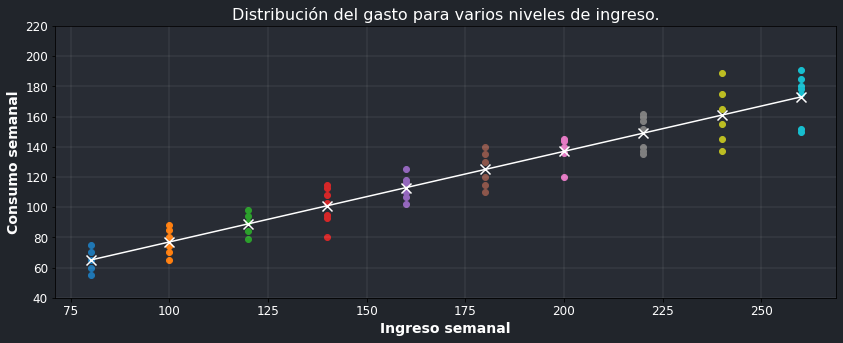

In [28]:
fig, ax = plt.subplots(figsize=(14,5))

plt.title('Distribución del gasto para varios niveles de ingreso.', size=16, color='white')
plt.grid(visible=True, linewidth=0.1, color='white')
fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

for i in list(df):
    plt.scatter(x=[i for j in range(7)], y=df[i])

plt.scatter(list(df), promedio, marker='x', s=100, color='white')
plt.plot(list(df), promedio, color='white')

plt.xlabel('Ingreso semanal', size=14, weight=700, color='white')
plt.xticks(color='white', size=12)

plt.ylabel('Consumo semanal', size=14, weight=700, color='white')
plt.yticks(color='white', size=12)
plt.ylim(40, 220)

El panorama general es que, a pesar de la variabilidad del consumo semanal en cada nivel de ingreso considerado, en promedio, el consumo semanal se incrementa a medida que aumenta el ingreso. 

En total hay 10 valores medios para las 10 subpoblaciones de Y. A estos valores medios se les llama **valores esperados condicionales**, en virtud de que dependen de los valores de la variable (condicional) X. En forma simbólica, se denotan con E(Y | X ), lo cual se lee como el valor esperado de Y, dado el valor de X.

Al unir los valores medios condicionales de Y obtenemos nuestra linea de regresión poblacional.

Aquí nos damos cuenta del poder de la regresión, si conocemos la información del nivel de ingresos de los hogares será mucho más preciso calcular el gasto promedio con base a este que simplemente calcular el valor promedio general (o valor espetado) de la muestra.

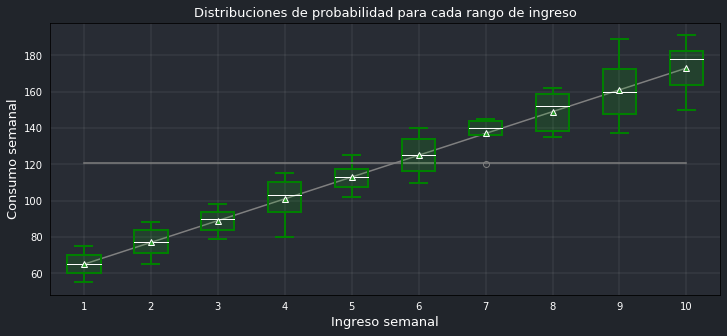

In [263]:
data = [df[i].dropna() for i in list(df)]

fig, ax = plt.subplots(figsize=(12, 5))
plt.title('Distribuciones de probabilidad para cada rango de ingreso', color='white', size= 13)
fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 
plt.grid(visible=True, linewidth=0.1, color='white')

plt.xlabel('Ingreso semanal', color='white', size=13)
plt.ylabel('Consumo semanal', color='white', size=13)

ax.tick_params(axis='x', which='both', colors='#21252b')
ax.tick_params(axis='y', which='both', colors='#21252b')

plt.xticks(color='white')
plt.yticks(color='white')

c='green'

plt.boxplot(
    data, 
    showmeans=True,
    patch_artist=True,
    boxprops=dict(color=c, linewidth=2, facecolor=(0, 1, 0, 0.1)),
    capprops=dict(color=c, linewidth=2),
    whiskerprops=dict(color=c, linewidth=2),
    flierprops=dict(markeredgecolor='gray'),
    medianprops=dict(color='white'),
    meanprops=dict(markeredgecolor='white')
)

values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(values, promedio, color='gray')
plt.plot(values, [121 for i in values], color='gray')

plt.show()

En esta gráfica podemos observar la gran diferencia entre el promedio general(121) y el valor del promedio dado un nivel de ingreso familiar. En algunos casos, la diferencia es abismal.